#  Tensorflow 2

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # 선형회귀
from tensorflow.keras.optimizers import Adam # 기울기

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
X = np.array([1,
              2,
              3], dtype="float32")

y = np.array([2,
              2.5,
              3.5], dtype="float32")
print("입력값 = ", X)
print("진짜값 = ", y)

입력값 =  [1. 2. 3.]
진짜값 =  [2.  2.5 3.5]


## Dense / input_dim 
- 선형회귀를 수행 할 객체
- W*X+b


In [ ]:
# 모델에 데이터를 분석할 객체 추가
model = Sequential()

# 선형회귀(WX+b)를 수행할 생성 객체
# Dense(1) : 출력데이터(예측값)는 1
# input_dim(1) : 입력칸(X)수 1
model.add(Dense(1,input_dim = 1))
model.summary()
# param : w(1),b(1)개수 합 2개
# Output Shape 줄(none:몰라)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


설정
- 최소가 되는 W,b계산 : loss
- 기울기 계산 : Adam


분석
- model.fit() 

In [ ]:
# Gradient Decent 계산해서 w,b 수정 방법 설정
# loss = cost : [MSE(진짜 - 예측)^의 합/데이터 수 ] 가 최소가 되는 W,b계산 할거임
# oversooting 방지 : Adam(lr) = learning_rate
model.compile(
    loss = "mean_squared_error",
    optimizer=Adam(lr=0.1) # 기울기 계산 : w_gred / b_gred
                  )

# 분석 , W,b 업데이트
# epochs= : 몇 번 반복?
model.fit(X, y, epochs=100)

In [ ]:
# W,b 리턴
# 오차 제곱의 합이 0에 가까운 값을 갖는 W, b
model.layers[0].get_weights()
model.layers[0].get_weights()[0][0]
w = model.layers[0].get_weights()[0][0]
b = model.layers[0].get_weights()[1][0]
print("X가 10일 때 예측 = ", w*10+b)
print("X가 20일 때 예측 = ", w*20+b)

X가 10일 때 예측 =  [7.4521294]
X가 20일 때 예측 =  [13.4148]


## 예측

In [ ]:
pred = model.predict([10,20])
pred

array([[ 7.4521294],
       [13.4148   ]], dtype=float32)

# 인공신경망 = 퍼셉트론
- 신경 세포의 동작을 컴퓨터적으로 구현한 것
- 다수의 신호를 입력으로 받아 하나의 신호 출력
- 1, 0
- 주로 분류에 사용
- 활성화함수 : sigmoid, Relu

In [ ]:
from math import e

In [ ]:
print(e)
print(e**-1)
print(e**0)

2.718281828459045
0.36787944117144233
1.0


In [ ]:
w = 2
b = 1

In [ ]:
hypothesis = w * -3 + b

In [ ]:
# 선형회귀 결과 -5 -> 0~1 사이 값으로 변환 : 활성화함수
hypothesis

-5

### 활성화 함수


In [ ]:
# 0,1 로 변환
print("선형회귀 결과(-5) = ", 1/(1+e**-hypothesis))

선형회귀 결과(-5) =  0.006692850924284857


In [ ]:

hypothesis = w * -1.5 + b
hypothesis

# 0,1로 변환 되었음
1/( 1 + e ** -hypothesis)

0.11920292202211757

##퍼셉트론 = 인공 신경망을 이용한 AND연산
- 76~106


In [ ]:
import numpy as np


In [ ]:
# 셋팅
X = np.array([
              [0., 0.],
              [0., 1.],
              [1., 0.],
              [1., 1.]
            ], dtype = "float32")
print("입력값 X = \n", X)
print("="*50)
y = np.array([
              [0.],
              [0.],
              [0.],
              [1.]
            ], dtype = "float32")
print("진짜값 y = \n", y)

입력값 X = 
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
진짜값 y = 
 [[0.]
 [0.]
 [0.]
 [1.]]


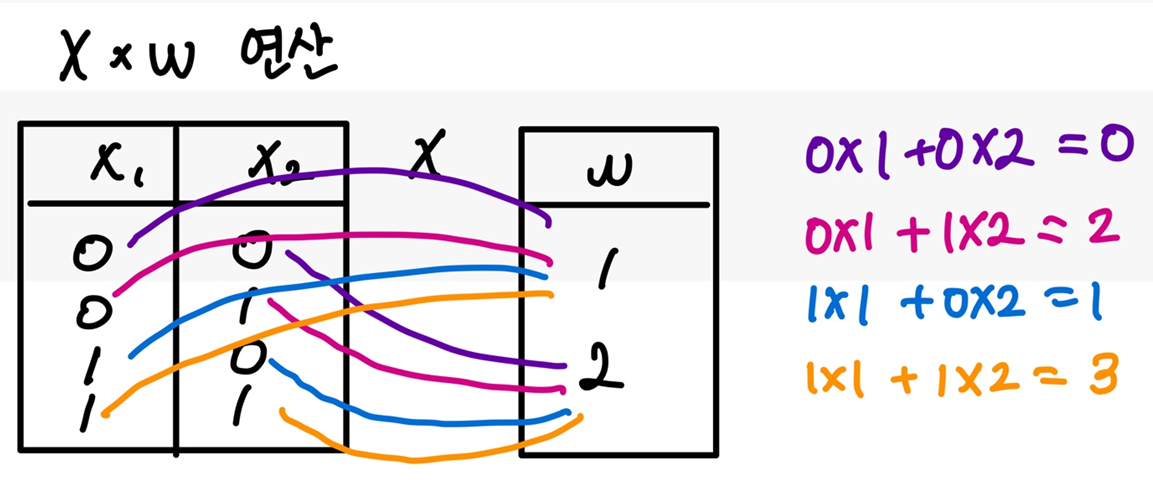

In [ ]:
w = np.array([[1],[2]], dtype = "float32")
b = np.array([3], dtype = "float32")
print("w = \n", w)
print("b = ", b)

print("="*50)

# 배열끼리 곱하기 -> .dot
hypothesis = np.dot(X,w) + b
# 선형 회귀 결과 = 예측값
print("선형회귀결과 =\n", hypothesis)

w = 
 [[1.]
 [2.]]
b =  [3.]
선형회귀결과 =
 [[3.]
 [5.]
 [4.]
 [6.]]


### 활성함수 sigmoid

In [ ]:
# 활성 함수사용하여 0,1 변환
# h : 선형회귀 결과
def sigmoid(h):
  return 1/(1 + np.exp(-h))

# sigmoid로 3,5,4,6 -> 0~1 사이 값들로 변환됨
# 변환된 예측값들
hypothesis = sigmoid(hypothesis)
hypothesis

array([[0.95257413],
       [0.9933072 ],
       [0.98201376],
       [0.9975274 ]], dtype=float32)

In [ ]:
# 오차 = 예측값 - 진짜값
hypothesis - y


array([[ 0.95257413],
       [ 0.9933072 ],
       [ 0.98201376],
       [-0.00247258]], dtype=float32)

### w1,w2 기울기 구하기

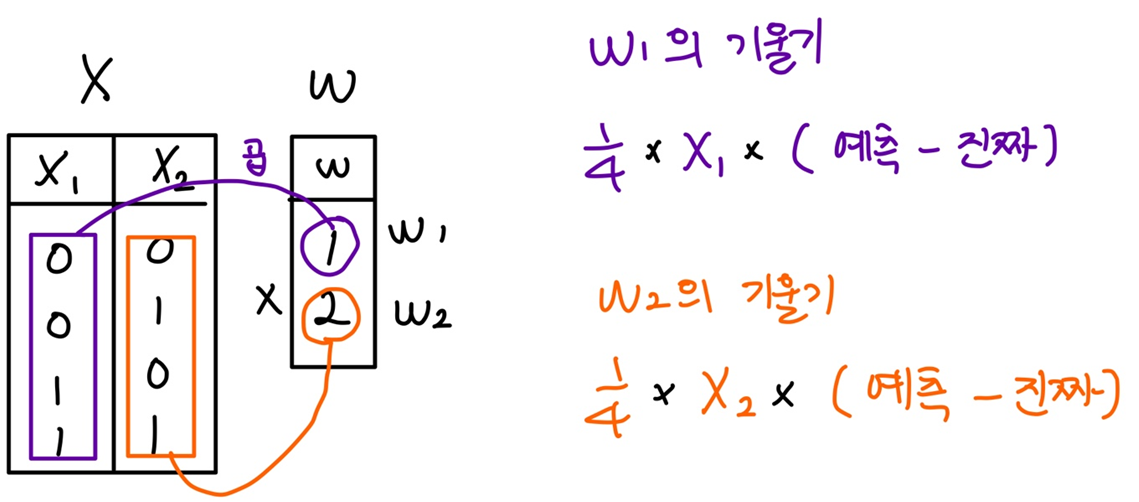

In [ ]:
# x1 리턴
print("x1 = " ,X.T[0])

# 곱할때는 괄호 수가 일치해야함
# 2차원 배열로 변환
# (1,4) : 1줄에 4칸
x1 = X.T[0].reshape(1,4)
print("x1 이차원 배열 = ",x1)

x1 =  [0. 0. 1. 1.]
x1 이차원 배열 =  [[0. 0. 1. 1.]]


In [ ]:
# 오차 = 예측 - 진짜
(hypothesis - y)

# np.sum : 괄호 2개 -> 없앰
np.sum(np.dot(x1,(hypothesis - y)))

# w1의 기울기
w1_grad = 1/4 * np.sum(np.dot(x1,(hypothesis - y)))
w1_grad

0.24488529562950134

In [ ]:
# x2 리턴
print("x2 = " ,X.T[1])

# 곱할때는 괄호 수가 일치해야함
# 2차원 배열로 변환
# (1,4) : 1줄에 4칸
x2 = X.T[1].reshape(1,4)
print("x2 이차원 배열 = ",x2)

x2 =  [0. 1. 0. 1.]
x2 이차원 배열 =  [[0. 1. 0. 1.]]


In [ ]:
# np.sum : 괄호 2개 -> 없앰
np.sum(np.dot(x2,(hypothesis - y)))

# w2의 기울기
w2_grad = 1/4 * np.sum(np.dot(x2,(hypothesis - y)))
w2_grad

0.24770864844322205

### 행열 연산 원리

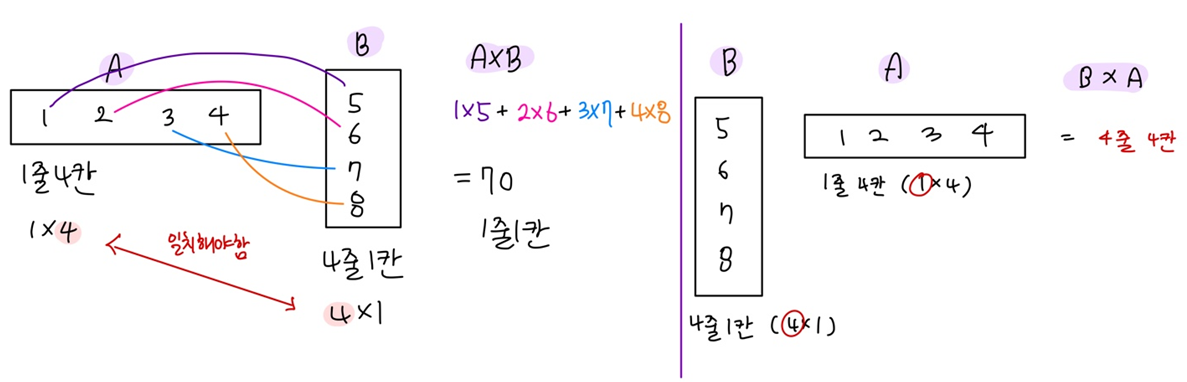

In [ ]:
# 행열 연산 원리

A = np.array([
              [1, 2, 3, 4]
            ], dtype="float32")

B = np.array([
              [5],
              [6],
              [7],
              [8]
            ], dtype="float32")

np.dot(A, B) # 1줄 1칸
np.dot(B, A) # 4줄 4칸

array([[ 5., 10., 15., 20.],
       [ 6., 12., 18., 24.],
       [ 7., 14., 21., 28.],
       [ 8., 16., 24., 32.]], dtype=float32)

In [ ]:
# b의 기울기
# np.sum : 데이터하나로 합치기
b_grad = 1/4 * np.sum((hypothesis - y))
b_grad

0.731355607509613

In [ ]:
w

array([[1.],
       [2.]], dtype=float32)

In [ ]:
b

array([3.], dtype=float32)

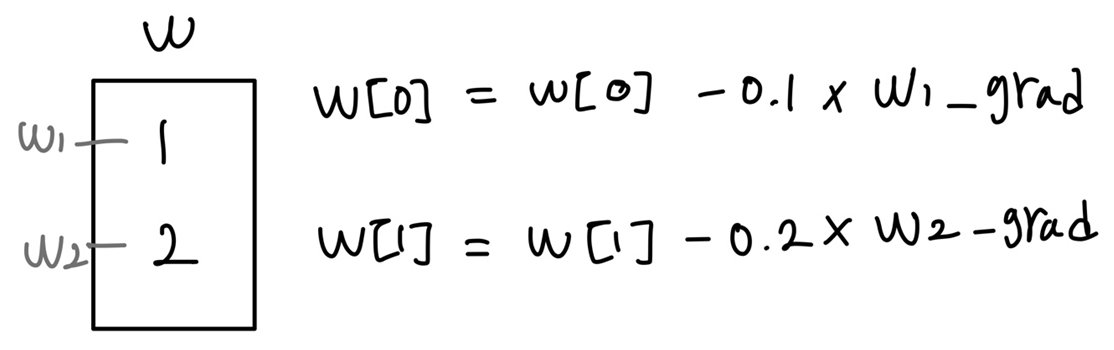

In [ ]:
# 업데이트된 기울기

w[0] = w[0] - 0.1 * w1_grad
w[1] = w[1] - 0.1 * w2_grad

print("w업뎃 :",w)

b = b - 0.1 * b_grad
print("b업뎃 :",b)

w업뎃 : [[0.9755115]
 [1.9752291]]
b업뎃 : [2.9268644]


### cost 계산

In [ ]:
# 예측값
hypothesis = sigmoid(np.dot(X, w) + b)
hypothesis

# cost 식
cost = -1/4 * (y * np.log(hypothesis)) + (1-y) * np.log(1-hypothesis)
cost

array([[-2.9790432e+00],
       [-4.9094977e+00],
       [-3.9223711e+00],
       [ 6.9940975e-04]], dtype=float32)

### cost가 0으로 수렴하는 w,b찾기

In [ ]:
learning_rate = 0.1

for i in range(1000):
  for j in range(2):
    hypothesis = sigmoid(np.dot(X, w)+b)
    print("예측값 = ", hypothesis)

    # 오차 계산
    cost = -1/4 * (y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
    print("cost = ", cost)

    # 2차원 배열
    X_col_2d = X.T[j].reshape(1,-1)

    # w 기울기 
    w_grad = 1/4*np.sum(np.dot(X_col_2d,(hypothesis-y)))
    print("w_{}grad : {}".format(i,w_grad))

    # w 업데이트
    w[j] = w[j] - learning_rate * w_grad
    print("w{} : {}".format(j,w))
    
    # b 기울기
    b_grad = 1/4 * np.sum(hypothesis - y)
    print("b{}_grad:{}".format(i,b_grad))
    # b 업데이트
    b = b - learning_rate * b_grad
    print("b:{}".format(b))

    print("="*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
b:[-4.304747]
예측값 =  [[0.01332436]
 [0.16237034]
 [0.16238774]
 [0.7356504 ]]
cost =  [[0.00335349]
 [0.0442948 ]
 [0.04429999]
 [0.07675005]]
w_821grad : -0.025494810193777084
w1 : [[2.6641788]
 [2.6666002]]
b821_grad:0.018433213233947754
b:[-4.3065906]
예측값 =  [[0.01330015]
 [0.16246638]
 [0.16213717]
 [0.7357877 ]]
cost =  [[0.00334735]
 [0.04432348]
 [0.04422522]
 [0.07670341]]
w_822grad : -0.025518786162137985
w0 : [[2.6667306]
 [2.6666002]]
b822_grad:0.018422842025756836
b:[-4.308433]
예측값 =  [[0.01327599]
 [0.16221583]
 [0.16223355]
 [0.73592556]]
cost =  [[0.00334122]
 [0.04424869]
 [0.04425398]
 [0.07665657]]
w_822grad : -0.025464653968811035
w1 : [[2.6667306]
 [2.6691468]]
b822_grad:0.01841273158788681
b:[-4.310274]
예측값 =  [[0.0132519 ]
 [0.16231172]
 [0.16198348]
 [0.7360626 ]]
cost =  [[0.00333512]
 [0.04427731]
 [0.04417937]
 [0.07661003]]
w_823grad : -0.025488484650850296
w0 : [[2.6692796]
 [2.6691468]]
b823_grad:0.018402419984340668
b:[-

In [ ]:
# 예측값
predict = sigmoid(np.dot(X,w)+b)
predict

array([[0.00735214],
       [0.1385928 ],
       [0.13838933],
       [0.7772349 ]], dtype=float32)

In [ ]:
int(True)
int(False)

# 예측값이 0.5 이상이면 1, 아니면 0
predict01 = np.where(predict>=0.5, 1, 0)
print("="*50)
print("predict01")
print(predict01)

predict01
[[0]
 [0]
 [0]
 [1]]


In [ ]:
# 진짜 값과 같은지 비교 리턴
predict02 = (predict01 == y)
predict02

array([[ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# True, False로 나온 결과를 0으로 변환해서 합산
np.sum(predict02)

4

In [ ]:
# 정확도 계산
acc = np.sum(predict02)/4
acc

1.0